#**Setup inicial**

#Segmentacion de "order_products__prior"

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive

nombre_archivo = '/content/drive/My Drive/MIA/2doSemestre/Analitica/db_taller_g1_instacard/order_products__prior.csv'
chunk_size = 10000  # Ajusta este valor según tu situación
total_filas = sum(1 for row in open(nombre_archivo, 'r')) - 1  # Total de filas sin contar el encabezado
filas_objetivo = int(total_filas * 0.1)  # 10% de las filas
filas_seleccionadas = 0
df_final = pd.DataFrame()

# Leer el archivo CSV por trozos
for chunk in pd.read_csv(nombre_archivo, chunksize=chunk_size):
    # Calcular cuántas filas seleccionar en este trozo
    filas_a_seleccionar = min(filas_objetivo - filas_seleccionadas, len(chunk))
    if filas_a_seleccionar <= 0:
        break  # Salir del bucle si ya hemos seleccionado suficientes filas

    # Verificar si necesitamos hacer un muestreo o tomar el trozo completo
    if filas_a_seleccionar / len(chunk) == 1:
        sample = chunk  # Tomar el trozo completo si necesitamos seleccionar todo
    else:
        _, sample = train_test_split(chunk, test_size=filas_a_seleccionar / len(chunk))

    # Agregar las filas seleccionadas al DataFrame final
    df_final = pd.concat([df_final, sample], ignore_index=True)
    filas_seleccionadas += len(sample)

    # Si ya hemos seleccionado el 60% de las filas, detener el bucle
    if filas_seleccionadas >= filas_objetivo:
        break

# Verificación y guardado
print(f"Total filas seleccionadas: {len(df_final)}")
df_final.to_csv('order_products__prior_reducida_10.csv', index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total filas seleccionadas: 3243448


#Carga de archivos


In [5]:
import io
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from google.colab import drive


# Montar Google Drive
drive.mount('/content/drive')

# Función para cargar todos los archivos CSV de una carpeta específica en Google Drive
def cargar_csv_desde_carpeta(carpeta_path):
    # Diccionario para almacenar los DataFrames
    dataframes = {}

    # Lista todos los archivos en la carpeta especificada
    archivos = os.listdir(carpeta_path)

    # Filtra por archivos CSV y los carga
    for archivo in archivos:
        if archivo.endswith('.csv'):
            ruta_completa = os.path.join(carpeta_path, archivo)
            df_temp = pd.read_csv(ruta_completa)

            # Utiliza el nombre del archivo como clave (sin la extensión .csv)
            clave_df = archivo[:-4]
            dataframes[clave_df] = df_temp

    return dataframes

# Ruta a la carpeta dentro de Google Drive donde tienes tus archivos CSV
carpeta_path = '/content/drive/My Drive/MIA/2doSemestre/Analitica/db_taller_g1_instacard'

# Cargar los CSVs
dfs = cargar_csv_desde_carpeta(carpeta_path)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Variables con data

In [6]:
df_aisles = dfs['aisles']
df_departments = dfs['departments']
# base de datos reducida aleatoreamente en un 50% y filtrada con el "eval_set":"prior"
df_order_products__prior_reducida = dfs['order_products__prior_reducida_10']
# solo para entrenamiento en ML
df_order_products__train = dfs['order_products__train']
df_orders = dfs['orders']
df_products = dfs['products']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#**Analisis de data bases**

#Descriptiva básica

In [7]:
for nombre in dfs.keys():
    # Imprimir las primeras 10 filas del dataframe recién cargado
    print(f"Archivo {nombre}: Primeras 50 filas")
    print(dfs[nombre].head(50))
    print("\n")  # Añade una línea en blanco entre los datos de diferentes archivos

    # Mostrar estadísticas descriptivas iniciales
    print(f"Estadísticas descriptivas iniciales para {nombre}:")
    print(dfs[nombre].describe())
    print("\n\n")  # Añade líneas en blanco para separar los datos de diferentes archivos


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Archivo departments: Primeras 50 filas
    department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing


Estadísticas descriptivas iniciales para departments:
       department_id
count      21.000000
mean       11.000000
std         6.204837
min         1.000000
25%         6.000000
50%      

In [ ]:
!pip install dataprep

#**Informes dataprep de DBs**

#df_aisles

In [ ]:
from dataprep.eda import create_report
report_aisles = create_report(df_aisles).show()

Output hidden; open in https://colab.research.google.com to view.

#df_departments

In [ ]:
from dataprep.eda import create_report
report_departments = create_report(df_departments).show()

Output hidden; open in https://colab.research.google.com to view.

#df_order_products__prior_reducida

In [ ]:
from dataprep.eda import create_report
report_order_products__prior_reducida = create_report(df_order_products__prior_reducida).show()

Output hidden; open in https://colab.research.google.com to view.

#df_products

In [ ]:
from dataprep.eda import create_report
report_products = create_report(df_products).show()

Output hidden; open in https://colab.research.google.com to view.

#df_orders


Filtrado de "orders" para dejar solo "eval_set":"prior"

In [ ]:
df_orders = df_orders.query('eval_set == "prior"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


In [ ]:
from dataprep.eda import create_report
report_orders = create_report(df_orders).show()

Output hidden; open in https://colab.research.google.com to view.

#**Merges**

#Merge de "df_products" con "df_aisles" y "df_departments"

In [8]:
products_and_aisles = pd.merge(df_products, df_aisles, how='left', on='aisle_id')
df_products_labels = pd.merge(products_and_aisles, df_departments, how='left', on='department_id')
print(df_products_labels.head(50))


    product_id                                       product_name  aisle_id  \
0            1                         Chocolate Sandwich Cookies        61   
1            2                                   All-Seasons Salt       104   
2            3               Robust Golden Unsweetened Oolong Tea        94   
3            4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4            5                          Green Chile Anytime Sauce         5   
5            6                                       Dry Nose Oil        11   
6            7                     Pure Coconut Water With Orange        98   
7            8                  Cut Russet Potatoes Steam N' Mash       116   
8            9                  Light Strawberry Blueberry Yogurt       120   
9           10     Sparkling Orange Juice & Prickly Pear Beverage       115   
10          11                                  Peach Mango Juice        31   
11          12                         Chocolate Fud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Merge "df_order_products__prior_reducida" con "df_products_labels"

In [9]:
# Crear un DataFrame intermedio con solo las columnas necesarias
df_products_labels_simple = df_products_labels[['product_id', 'product_name', 'aisle', 'department']]

# Realizar el merge usando el DataFrame simplificado
df_orders_prior_result = pd.merge(df_order_products__prior_reducida, df_products_labels_simple, on='product_id', how='left')

# Mostrar las primeras filas del resultado para verificar
print(df_orders_prior_result.head(50))

# Guardar el DataFrame 'resultado_merge' en un archivo CSV
df_orders_prior_result.to_csv('df_orders_prior_result.csv', index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


    order_id  product_id  add_to_cart_order  reordered  \
0          2       33120                  1          1   
1          2       28985                  2          1   
2          2        9327                  3          0   
3          2       45918                  4          1   
4          2       30035                  5          0   
5          2       17794                  6          1   
6          2       40141                  7          1   
7          2        1819                  8          1   
8          2       43668                  9          0   
9          3       33754                  1          1   
10         3       24838                  2          1   
11         3       17704                  3          1   
12         3       21903                  4          1   
13         3       17668                  5          1   
14         3       46667                  6          1   
15         3       17461                  7          1   
16         3  

In [11]:
df_orders_prior_result.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id,add_to_cart_order,reordered
count,3.243448e+06,3.243448e+06,3.243448e+06,3.243448e+06
mean,1.711266e+05,2.558157e+04,8.350413e+00,5.895220e-01
std,9.878196e+04,1.409542e+04,7.143107e+00,4.919206e-01
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.582675e+04,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.709250e+05,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.566040e+05,3.793500e+04,1.100000e+01,1.000000e+00
max,3.432100e+05,4.968800e+04,1.270000e+02,1.000000e+00


#**Gráficos**

#Algunos gráficos con "df_orders_prior_result" y "df_orders"

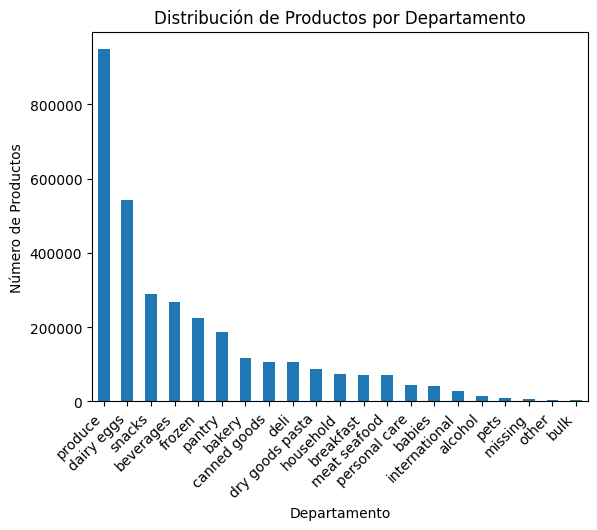

In [ ]:
import matplotlib.pyplot as plt

# Contar el número de productos por departamento
conteo_departamento = df_orders_prior_result['department'].value_counts()

# Graficar
conteo_departamento.plot(kind='bar')
plt.title('Distribución de Productos por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Número de Productos')
plt.xticks(rotation=45, ha='right')
plt.show()


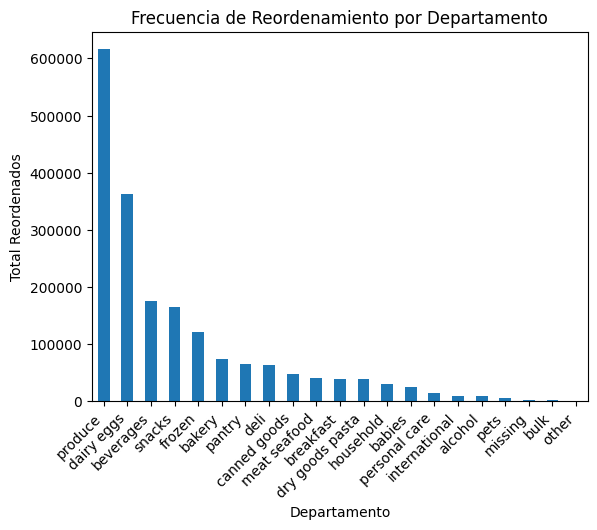

In [ ]:
# Calcular el total de productos reordenados por departamento
reordenados_departamento = df_orders_prior_result.groupby('department')['reordered'].sum()

# Graficar
reordenados_departamento.sort_values(ascending=False).plot(kind='bar')
plt.title('Frecuencia de Reordenamiento por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Total Reordenados')
plt.xticks(rotation=45, ha='right')
plt.show()


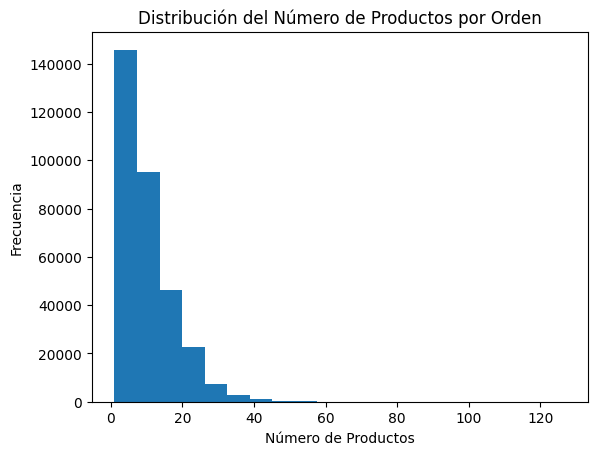

In [ ]:
# Calcular el número de productos por orden
productos_por_orden = df_orders_prior_result.groupby('order_id').size()

# Graficar
productos_por_orden.plot(kind='hist', bins=20)
plt.title('Distribución del Número de Productos por Orden')
plt.xlabel('Número de Productos')
plt.ylabel('Frecuencia')
plt.show()


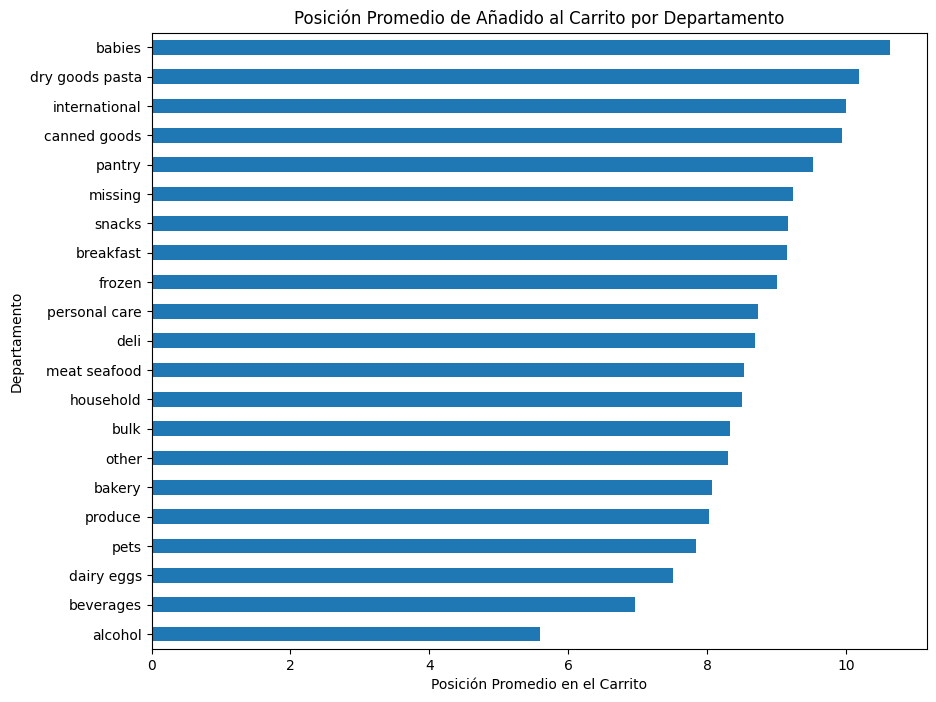

In [ ]:
# Calcular la posición promedio de añadido al carrito por departamento
cart_order_promedio = df_orders_prior_result.groupby('department')['add_to_cart_order'].mean()

# Graficar
cart_order_promedio.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Posición Promedio de Añadido al Carrito por Departamento')
plt.xlabel('Posición Promedio en el Carrito')
plt.ylabel('Departamento')
plt.show()


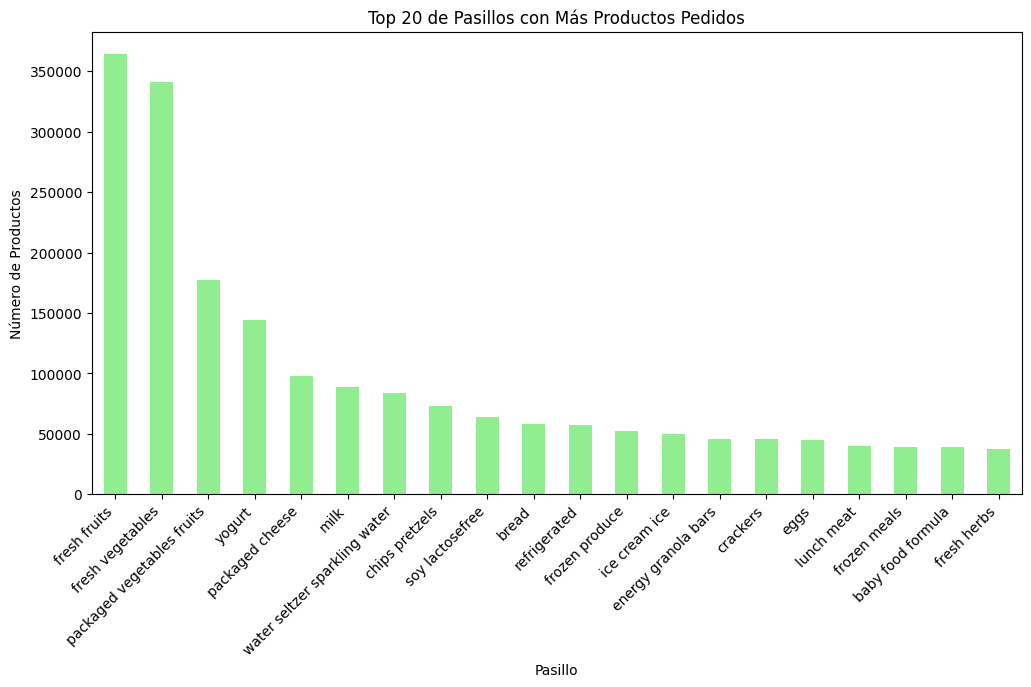

In [ ]:
# Contar el número de productos ordenados por pasillo
conteo_pasillo = df_orders_prior_result['aisle'].value_counts().head(20)  # Limitar a los 20 pasillos más populares para claridad

# Graficar
conteo_pasillo.plot(kind='bar', figsize=(12, 6), color='lightgreen')
plt.title('Top 20 de Pasillos con Más Productos Pedidos')
plt.xlabel('Pasillo')
plt.ylabel('Número de Productos')
plt.xticks(rotation=45, ha='right')
plt.show()


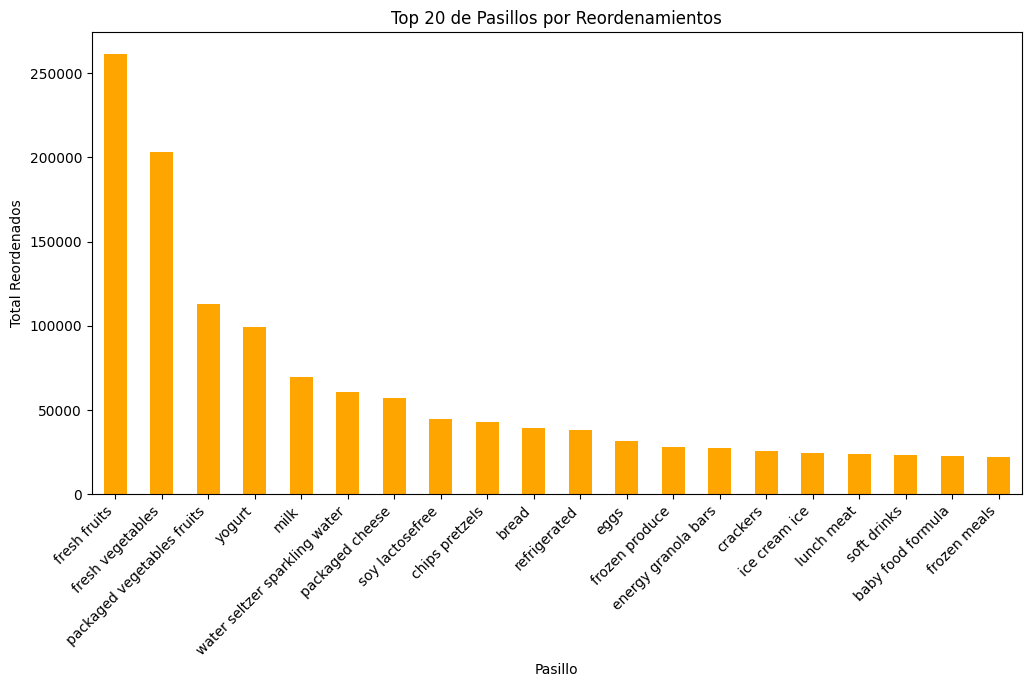

In [ ]:
# Calcular la suma de reordenamientos por pasillo
reordenados_por_pasillo = df_orders_prior_result.groupby('aisle')['reordered'].sum().sort_values(ascending=False).head(20)

# Graficar
reordenados_por_pasillo.plot(kind='bar', figsize=(12, 6), color='orange')
plt.title('Top 20 de Pasillos por Reordenamientos')
plt.xlabel('Pasillo')
plt.ylabel('Total Reordenados')
plt.xticks(rotation=45, ha='right')
plt.show()



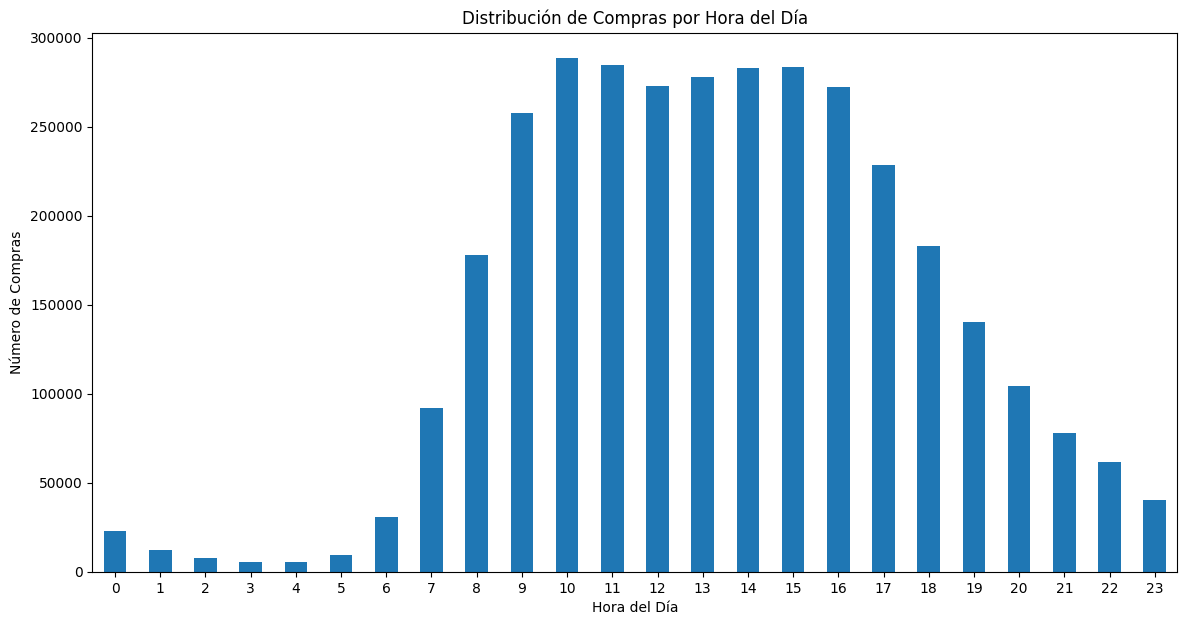

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
horas_del_dia = df_orders['order_hour_of_day'].value_counts().sort_index()

# Gráfico de la distribución de compras por hora del día
plt.figure(figsize=(14, 7))
horas_del_dia.plot(kind='bar')
plt.title('Distribución de Compras por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Compras')
plt.xticks(rotation=0)
plt.show()




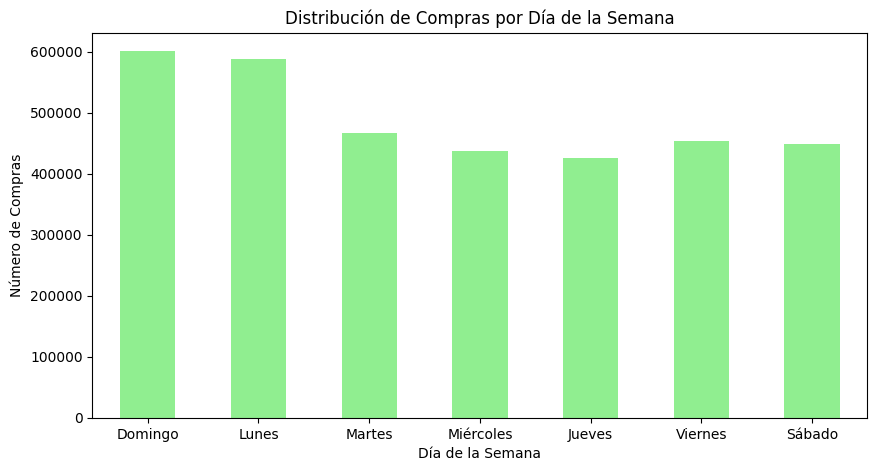

In [ ]:
# Contar las órdenes por cada día de la semana
dias_de_la_semana = df_orders['order_dow'].value_counts().sort_index()

# Graficar la distribución de compras por día de la semana
plt.figure(figsize=(10, 5))
dias_de_la_semana.plot(kind='bar', color='lightgreen')
plt.title('Distribución de Compras por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Compras')
# Puedes cambiar las etiquetas del eje x por los nombres de los días si prefieres
plt.xticks(ticks=range(0, 7), labels=['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado'], rotation=0)
plt.show()


#**Apriori**

#Reglas Apriori tests 1

DB Mini: 10000 registros

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Leer los datos
df_temp_apriori = pd.read_csv("/content/drive/My Drive/MIA/2doSemestre/Analitica/db_taller_g1_instacard/df_orders_prior_result_mini.csv")

# Limpieza de datos: asegurarse de que no hay valores NaN y que todos son strings
df_temp_apriori['product_name'] = df_temp_apriori['product_name'].astype(str).dropna()

# Agrupar los productos por order_id para obtener las transacciones
transacciones = df_temp_apriori.groupby('order_id')['product_name'].apply(list).tolist()

# Instanciar el TransactionEncoder
encoder = TransactionEncoder()
# Ajustar y transformar los datos
transacciones_encoded = encoder.fit(transacciones).transform(transacciones)
# Convertir a DataFrame
df_transacciones = pd.DataFrame(transacciones_encoded, columns=encoder.columns_)

# Aplicar el algoritmo Apriori para encontrar conjuntos de ítems frecuentes
conjuntos_frecuentes = apriori(df_transacciones, min_support=0.01, use_colnames=True)

# Generar las reglas de asociación
reglas = association_rules(conjuntos_frecuentes, metric="confidence", min_threshold=0.1)

# Mostrar las reglas
print(reglas[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                 antecedents               consequents   support  confidence  \
0   (Bag of Organic Bananas)    (Organic Hass Avocado)  0.017733    0.193277   
1     (Organic Hass Avocado)  (Bag of Organic Bananas)  0.017733    0.338235   
2      (Organic Raspberries)  (Bag of Organic Bananas)  0.011565    0.384615   
3   (Bag of Organic Bananas)     (Organic Raspberries)  0.011565    0.126050   
4   (Bag of Organic Bananas)    (Organic Strawberries)  0.014649    0.159664   
5     (Organic Strawberries)  (Bag of Organic Bananas)  0.014649    0.260274   
6          (Organic Avocado)                  (Banana)  0.012336    0.301887   
7                   (Banana)         (Organic Avocado)  0.012336    0.102564   
8     (Organic Baby Spinach)                  (Banana)  0.018504    0.342857   
9                   (Banana)    (Organic Baby Spinach)  0.018504    0.1

Sobre 1200000 o 1.2 M o 1.2e6

In [9]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Leer los datos
df_temp_apriori = pd.read_csv("/content/drive/My Drive/MIA/2doSemestre/Analitica/db_taller_g1_instacard/df_orders_prior_result.csv", nrows=1200000)

# Limpieza de datos: asegurarse de que no hay valores NaN y que todos son strings
df_temp_apriori['product_name'] = df_temp_apriori['product_name'].astype(str).dropna()

# Agrupar los productos por order_id para obtener las transacciones
transacciones = df_temp_apriori.groupby('order_id')['product_name'].apply(list).tolist()

# Instanciar el TransactionEncoder
encoder = TransactionEncoder()
# Ajustar y transformar los datos
transacciones_encoded = encoder.fit(transacciones).transform(transacciones)
# Convertir a DataFrame
df_transacciones = pd.DataFrame(transacciones_encoded, columns=encoder.columns_)

# Aplicar el algoritmo Apriori para encontrar conjuntos de ítems frecuentes
conjuntos_frecuentes = apriori(df_transacciones, min_support=0.01, use_colnames=True)

# Generar las reglas de asociación
reglas = association_rules(conjuntos_frecuentes, metric="confidence", min_threshold=0.1)

# Mostrar las reglas
print(reglas[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                 antecedents               consequents   support  confidence  \
0     (Organic Baby Spinach)  (Bag of Organic Bananas)  0.016120    0.213919   
1   (Bag of Organic Bananas)    (Organic Baby Spinach)  0.016120    0.134871   
2   (Bag of Organic Bananas)    (Organic Hass Avocado)  0.019272    0.161240   
3     (Organic Hass Avocado)  (Bag of Organic Bananas)  0.019272    0.291249   
4   (Bag of Organic Bananas)     (Organic Raspberries)  0.012750    0.106673   
5      (Organic Raspberries)  (Bag of Organic Bananas)  0.012750    0.300813   
6   (Bag of Organic Bananas)    (Organic Strawberries)  0.019154    0.160256   
7     (Organic Strawberries)  (Bag of Organic Bananas)  0.019154    0.233456   
8              (Large Lemon)                  (Banana)  0.012682    0.268697   
9          (Organic Avocado)                  (Banana)  0.016355    0.3

Gráfico de nodos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


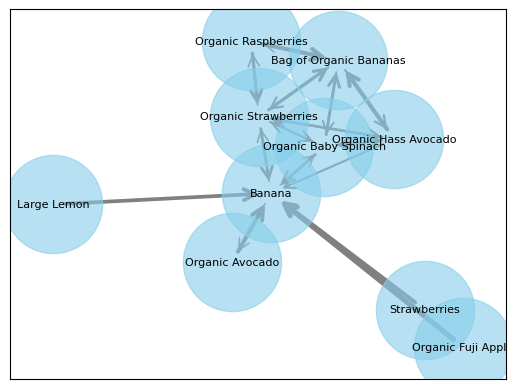

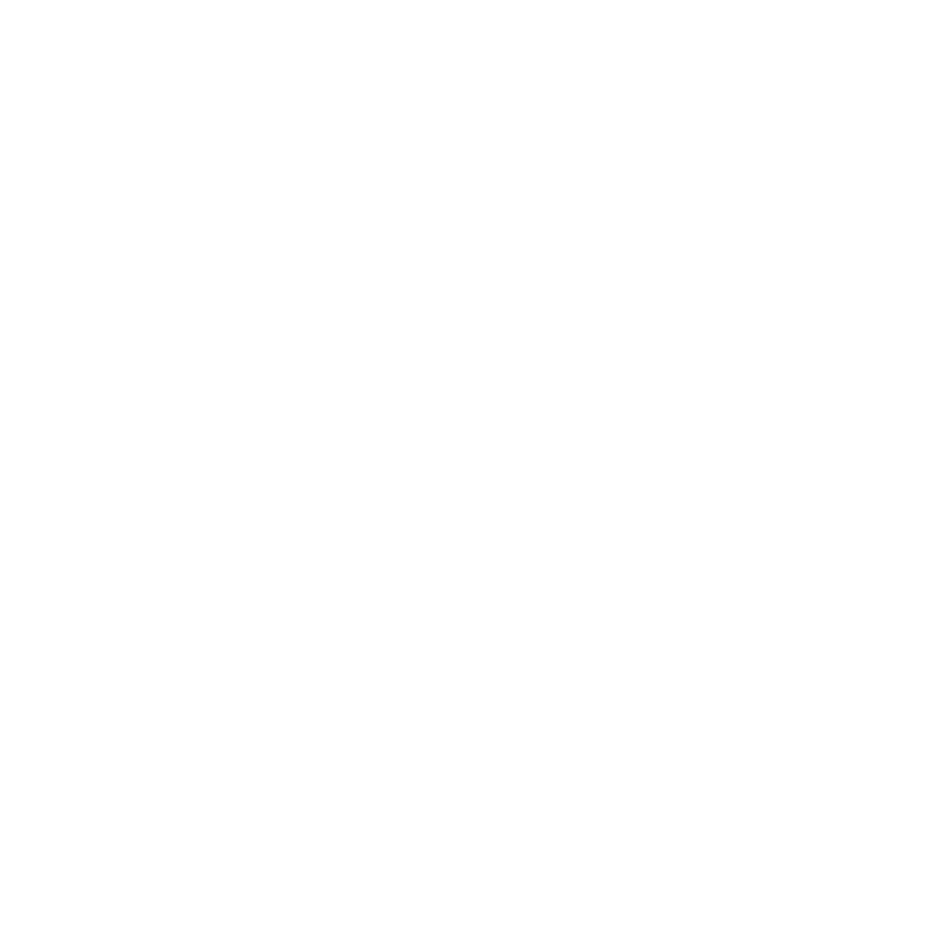

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

# Convertir los conjuntos en las columnas 'antecedents' y 'consequents' a strings
reglas['antecedents'] = reglas['antecedents'].apply(lambda x: ', '.join(list(x)))
reglas['consequents'] = reglas['consequents'].apply(lambda x: ', '.join(list(x)))

# Crear el gráfico dirigido
G = nx.DiGraph()

# Añadir aristas desde las reglas
for _, row in reglas.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['confidence']*10, support=row['support'], confidence=row['confidence'], lift=row['lift'])

# Posicionamiento de los nodos usando el algoritmo de Kamada-Kawai
pos = nx.kamada_kawai_layout(G)

# Dibujar los nodos
nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=5000, alpha=0.6)

# Dibujar las etiquetas de los nodos
nx.draw_networkx_labels(G, pos, font_size=8)

# Dibujar las aristas
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]
nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle="->", arrowsize=20, edge_color="gray", width=weights)

# Mostrar el gráfico
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.show()


##Filtros de popularidad sobre "df_orders_prior_result" y reglas Apriori

Filtrados por popularidad de "department"

In [11]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Leer los datos
df_temp_apriori = pd.read_csv("/content/drive/My Drive/MIA/2doSemestre/Analitica/db_taller_g1_instacard/df_orders_prior_result.csv")

# Asumiendo que df es tu DataFrame
# Reemplaza 'your_dataframe' con el nombre de tu variable DataFrame real
df = pd.DataFrame(df_temp_apriori)

# Contar las ocurrencias de cada departamento y ordenarlas de mayor a menor
departamentos_populares = df['department'].value_counts().sort_values(ascending=False)

# Mostrar los departamentos más populares
print(departamentos_populares)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
department
produce            947837
dairy eggs         541262
snacks             288768
beverages          268706
frozen             224056
pantry             187042
bakery             117501
canned goods       106610
deli               105464
dry goods pasta     86219
household           73689
breakfast           71345
meat seafood        70857
personal care       45002
babies              42807
international       27009
alcohol             15303
pets                10012
missing              6895
other                3611
bulk                 3453
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


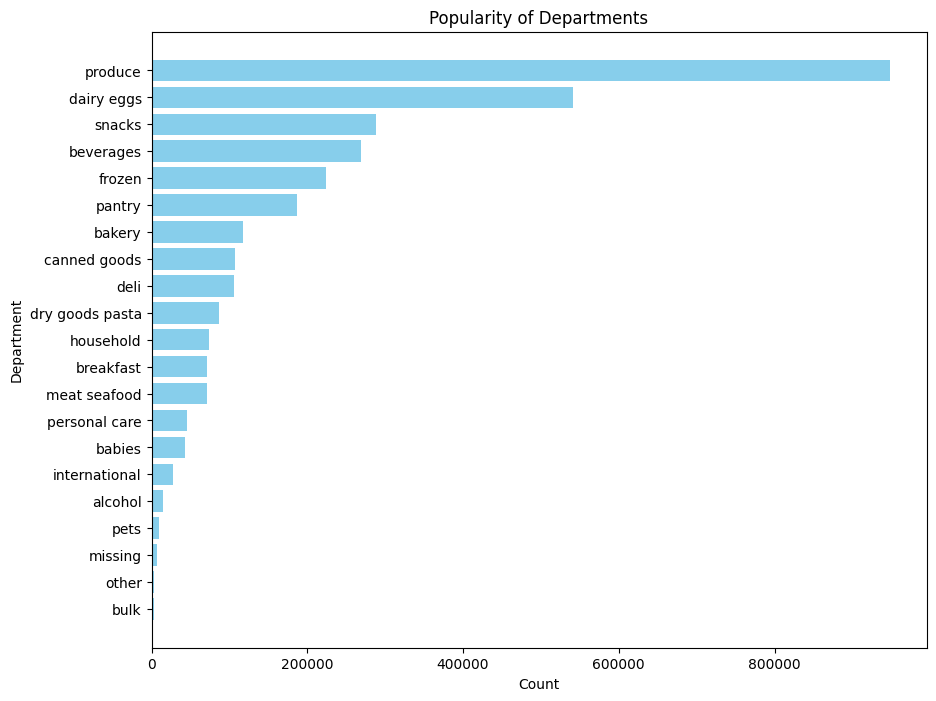

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Si no está ordenada de mayor a menor, puedes ordenarla con:
departamentos_populares_sorted = departamentos_populares.sort_values(ascending=False)

# Graficar
plt.figure(figsize=(10, 8))
plt.barh(departamentos_populares_sorted.index, departamentos_populares_sorted.values, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Department')
plt.title('Popularity of Departments')
plt.gca().invert_yaxis()  # Invertir el eje y para tener el departamento más popular en la parte superior
plt.show()


Apriori según "deparments" populares

In [17]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Leer los datos de productos y transacciones
df_temp_apriori = pd.read_csv("/content/drive/My Drive/MIA/2doSemestre/Analitica/db_taller_g1_instacard/df_orders_prior_result.csv", nrows=1200000)

# filtrar df_temp_apriori para mantener solo productos de los 10 departamentos más populares
# Lista de los 10 departamentos más populares
top_10_departments = ['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen', 'pantry', 'bakery', 'canned goods', 'deli', 'dry goods pasta']

# Filtrar df_temp_apriori para incluir solo productos de los 10 departamentos más populares
df_filtered = df_temp_apriori[df_temp_apriori['department'].isin(top_10_departments)]

# Limpieza de datos: asegurarse de que no hay valores NaN y que todos son strings
df_filtered['product_name'] = df_filtered['product_name'].astype(str).dropna()

# Agrupar los productos por order_id para obtener las transacciones
transacciones = df_filtered.groupby('order_id')['product_name'].apply(list).tolist()

# Instanciar el TransactionEncoder y convertir las transacciones a un formato adecuado
encoder = TransactionEncoder()
transacciones_encoded = encoder.fit_transform(transacciones)
df_transacciones = pd.DataFrame(transacciones_encoded, columns=encoder.columns_)

# Aplicar el algoritmo Apriori para encontrar conjuntos de ítems frecuentes
conjuntos_frecuentes = apriori(df_transacciones, min_support=0.01, use_colnames=True)

# Generar las reglas de asociación
reglas = association_rules(conjuntos_frecuentes, metric="confidence", min_threshold=0.1)

# Mostrar las reglas
print(reglas[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-17-c606347d85cc>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['product_name'] = df_filtered['product_name'].astype(str).dropna()


                 antecedents               consequents   support  confidence  \
0   (Bag of Organic Bananas)    (Organic Baby Spinach)  0.016366    0.134871   
1     (Organic Baby Spinach)  (Bag of Organic Bananas)  0.016366    0.213919   
2   (Bag of Organic Bananas)    (Organic Hass Avocado)  0.019566    0.161240   
3     (Organic Hass Avocado)  (Bag of Organic Bananas)  0.019566    0.291249   
4   (Bag of Organic Bananas)     (Organic Raspberries)  0.012944    0.106673   
5      (Organic Raspberries)  (Bag of Organic Bananas)  0.012944    0.300813   
6   (Bag of Organic Bananas)    (Organic Strawberries)  0.019446    0.160256   
7     (Organic Strawberries)  (Bag of Organic Bananas)  0.019446    0.233456   
8              (Large Lemon)                  (Banana)  0.012876    0.268697   
9                   (Banana)         (Organic Avocado)  0.016605    0.110681   
10         (Organic Avocado)                  (Banana)  0.016605    0.304253   
11    (Organic Baby Spinach)            

Filtrados por popularidad de "aisle"

In [13]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Leer los datos
df_temp_apriori = pd.read_csv("/content/drive/My Drive/MIA/2doSemestre/Analitica/db_taller_g1_instacard/df_orders_prior_result.csv")

# Asumiendo que df es tu DataFrame
# Reemplaza 'your_dataframe' con el nombre de tu variable DataFrame real
df = pd.DataFrame(df_temp_apriori)

# Contar las ocurrencias de cada departamento y ordenarlas de mayor a menor
aisle_populares = df['aisle'].value_counts().sort_values(ascending=False)

# Mostrar los departamentos más populares
print(aisle_populares)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
aisle
fresh fruits                  364196
fresh vegetables              341391
packaged vegetables fruits    176953
yogurt                        144519
packaged cheese                98146
                               ...  
eye ear care                     909
baby bath body care              816
baby accessories                 791
beauty                           592
frozen juice                     458
Name: count, Length: 134, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


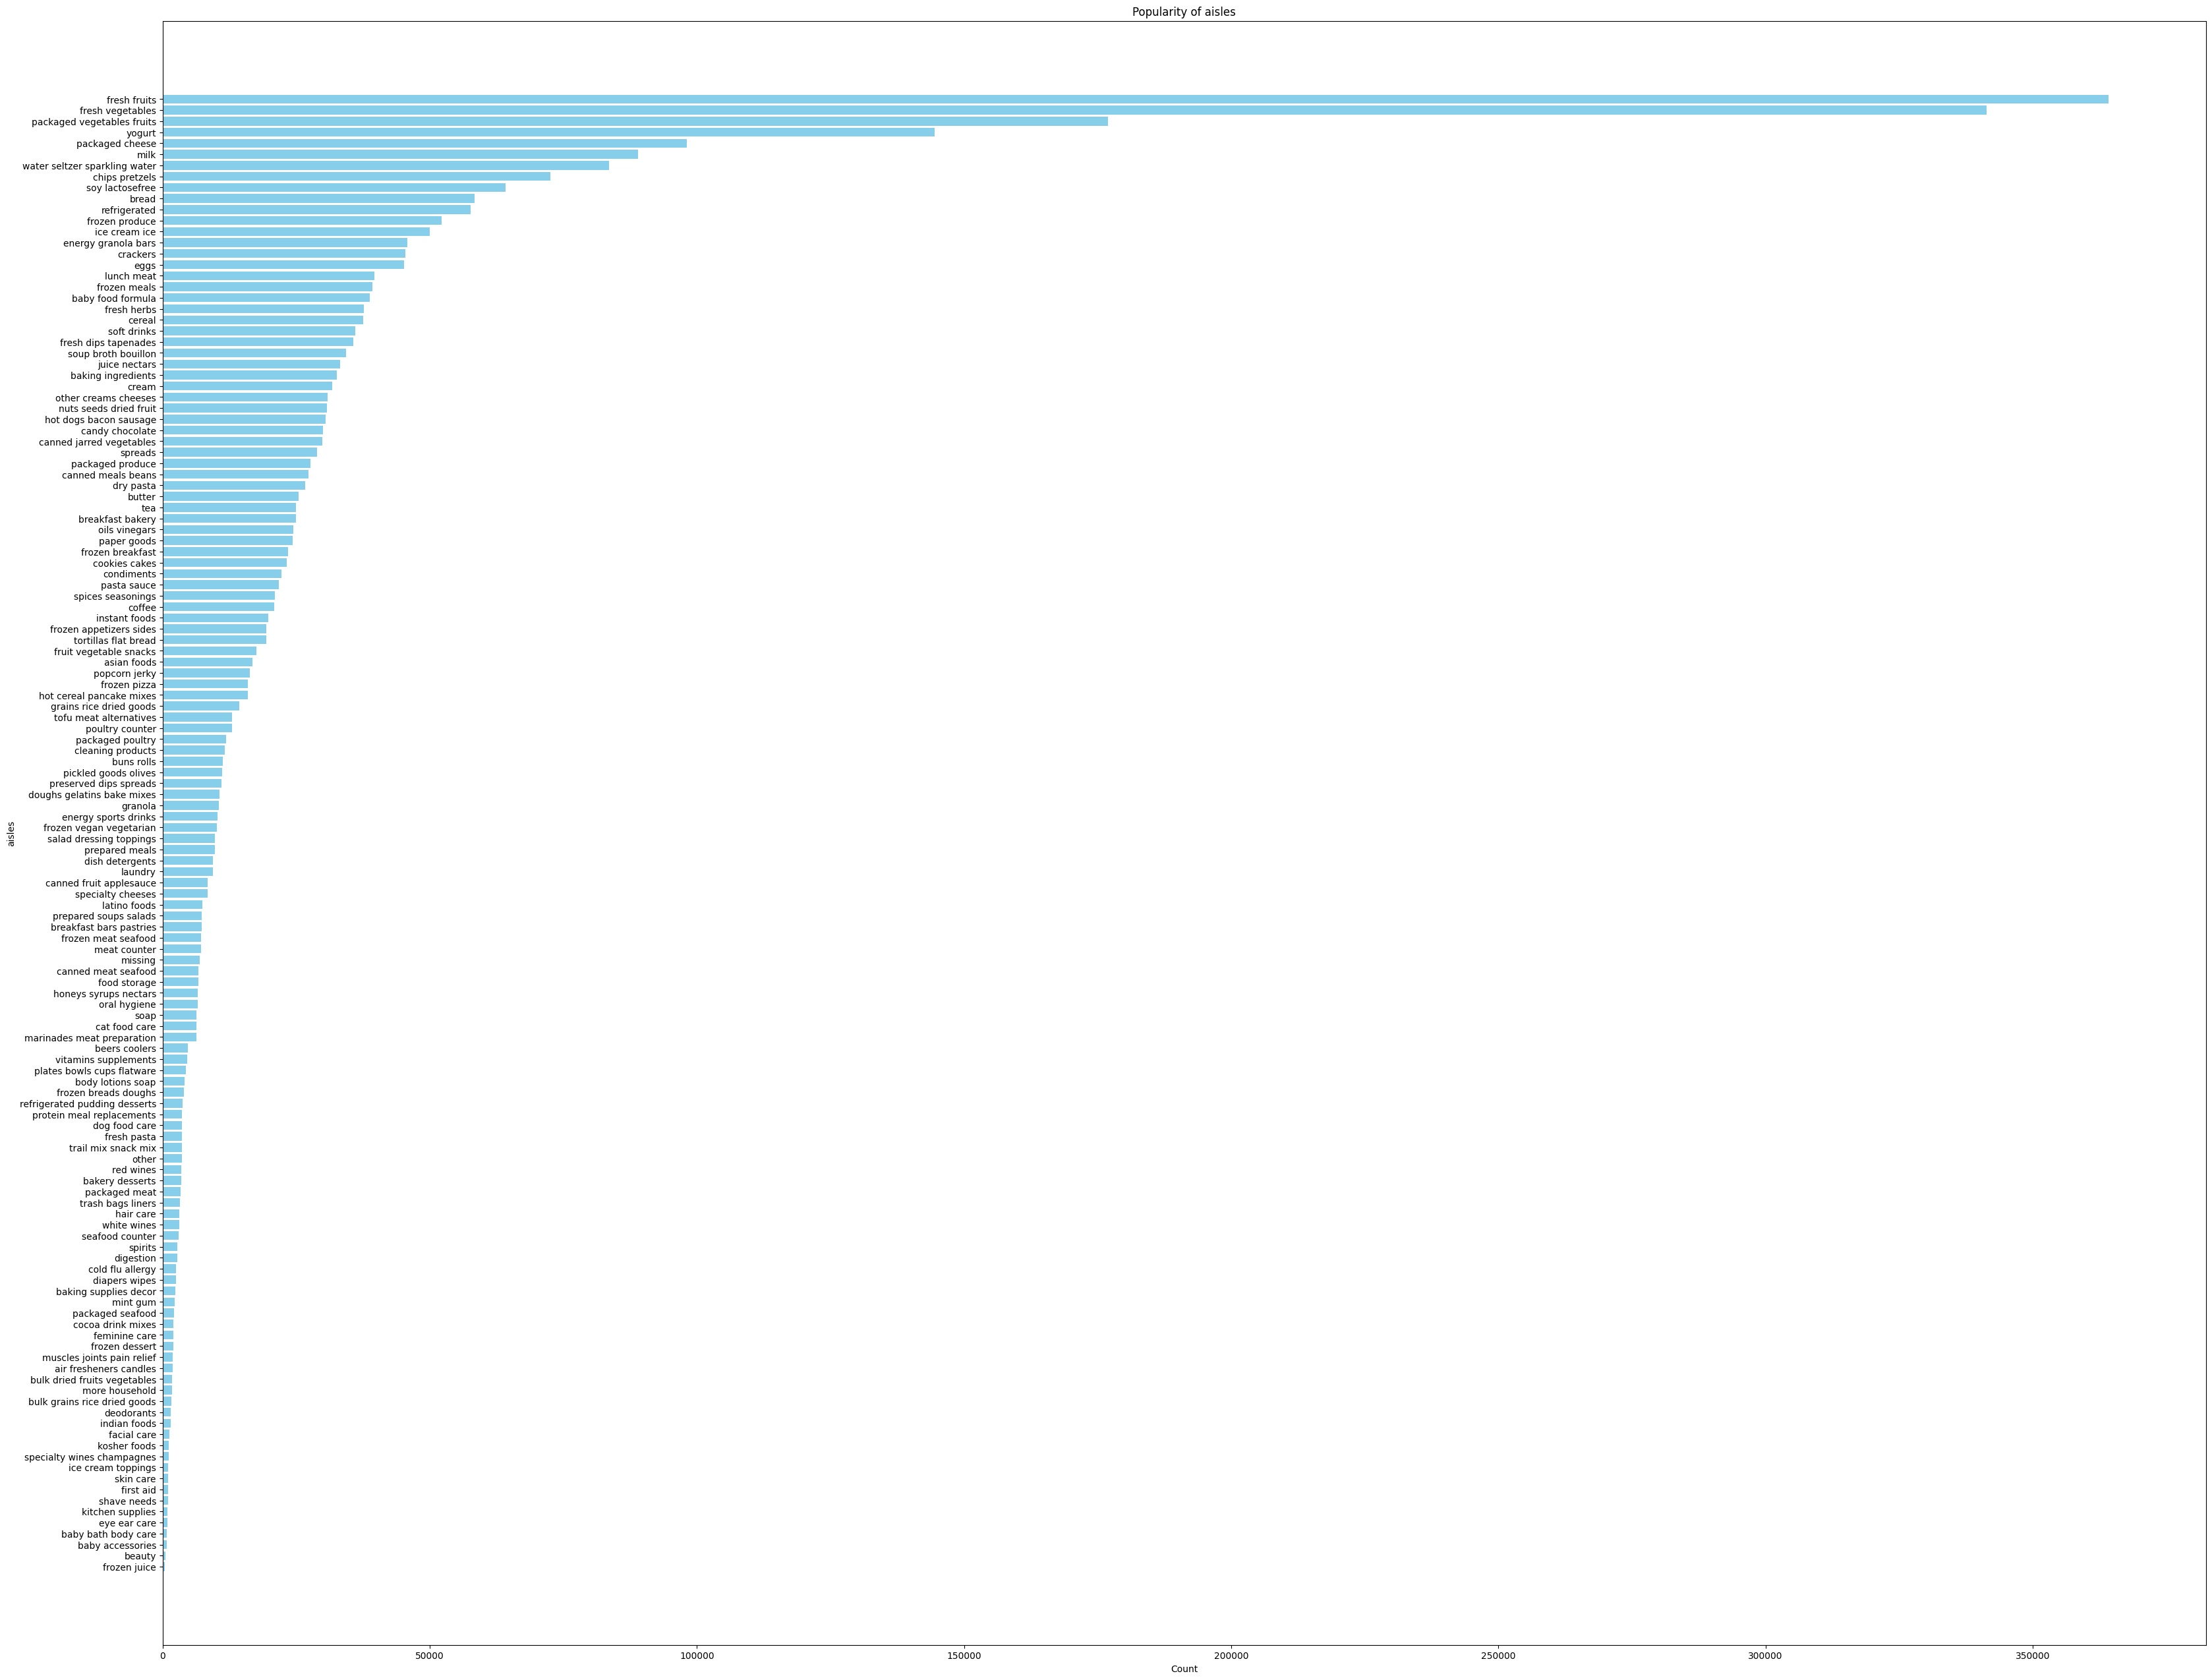

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Si no está ordenada de mayor a menor, puedes ordenarla con:
aisle_populares_sorted = aisle_populares.sort_values(ascending=False)

# Graficar
plt.figure(figsize=(40, 32))
plt.barh(aisle_populares_sorted.index, aisle_populares.values, color='skyblue')
plt.xlabel('Count')
plt.ylabel('aisles')
plt.title('Popularity of aisles')
plt.gca().invert_yaxis()  # Invertir el eje y para tener el departamento más popular en la parte superior
plt.show()


Apriori según "aisle" populares

In [18]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Leer los datos de productos y transacciones
df_temp_apriori = pd.read_csv("/content/drive/My Drive/MIA/2doSemestre/Analitica/db_taller_g1_instacard/df_orders_prior_result.csv", nrows=1200000)
top_5_aisles = ['fresh fruits', 'fresh vegetables', 'packaged vegetables fruits', 'yogurt', 'packaged cheese']
df_filtered = df_temp_apriori[df_temp_apriori['aisle'].isin(top_5_aisles)]

# Limpieza de datos: asegurarse de que no hay valores NaN y que todos son strings
df_filtered['product_name'] = df_filtered['product_name'].astype(str).dropna()

# Agrupar los productos por order_id para obtener las transacciones
transacciones = df_filtered.groupby('order_id')['product_name'].apply(list).tolist()

# Instanciar el TransactionEncoder y convertir las transacciones a un formato adecuado
encoder = TransactionEncoder()
transacciones_encoded = encoder.fit_transform(transacciones)
df_transacciones = pd.DataFrame(transacciones_encoded, columns=encoder.columns_)

# Aplicar el algoritmo Apriori para encontrar conjuntos de ítems frecuentes
conjuntos_frecuentes = apriori(df_transacciones, min_support=0.01, use_colnames=True)

# Generar las reglas de asociación
reglas = association_rules(conjuntos_frecuentes, metric="confidence", min_threshold=0.1)

# Mostrar las reglas
print(reglas[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-18-b699b5e0894f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['product_name'] = df_filtered['product_name'].astype(str).dropna()


                 antecedents               consequents   support  confidence  \
0     (Organic Baby Spinach)  (Bag of Organic Bananas)  0.020230    0.213919   
1   (Bag of Organic Bananas)    (Organic Baby Spinach)  0.020230    0.134871   
2   (Bag of Organic Bananas)    (Organic Hass Avocado)  0.024186    0.161240   
3     (Organic Hass Avocado)  (Bag of Organic Bananas)  0.024186    0.291249   
4   (Bag of Organic Bananas)     (Organic Raspberries)  0.016001    0.106673   
5      (Organic Raspberries)  (Bag of Organic Bananas)  0.016001    0.300813   
6   (Bag of Organic Bananas)    (Organic Strawberries)  0.024038    0.160256   
7     (Organic Strawberries)  (Bag of Organic Bananas)  0.024038    0.233456   
8           (Cucumber Kirby)                  (Banana)  0.012277    0.329092   
9         (Honeycrisp Apple)                  (Banana)  0.011254    0.357334   
10             (Large Lemon)                  (Banana)  0.015916    0.268697   
11                   (Limes)            

Filtrados por popularidad de "product_name"

In [16]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Leer los datos
df_temp_apriori = pd.read_csv("/content/drive/My Drive/MIA/2doSemestre/Analitica/db_taller_g1_instacard/df_orders_prior_result.csv")

# Asumiendo que df es tu DataFrame
# Reemplaza 'your_dataframe' con el nombre de tu variable DataFrame real
df = pd.DataFrame(df_temp_apriori)

# Contar las ocurrencias de cada departamento y ordenarlas de mayor a menor
departamentos_populares = df['product_name'].value_counts().sort_values(ascending=False)

# Mostrar los departamentos más populares
print(departamentos_populares)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
product_name
Banana                                                       47489
Bag of Organic Bananas                                       37914
Organic Strawberries                                         26338
Organic Baby Spinach                                         24202
Organic Hass Avocado                                         21200
                                                             ...  
Moisturizing Body Lotion                                         1
Echinacea Liquid Herbal Extract                                  1
SleepThru Liquid Phyto-Caps Vegetarian Dietary Supplement        1
Carrot Cupcake                                                   1
Milk Chocolate Toffee Crisp Minis                                1
Name: count, Length: 43631, dtype: int64


In [20]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Leer los datos de productos y transacciones
df_temp_apriori = pd.read_csv("/content/drive/My Drive/MIA/2doSemestre/Analitica/db_taller_g1_instacard/df_orders_prior_result.csv", nrows=1200000)
top_5_product_name = ['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 'Organic Baby Spinach', 'Organic Hass Avocado']
df_filtered = df_temp_apriori[df_temp_apriori['product_name'].isin(top_5_product_name)]

# Limpieza de datos: asegurarse de que no hay valores NaN y que todos son strings
df_filtered['product_name'] = df_filtered['product_name'].astype(str).dropna()

# Agrupar los productos por order_id para obtener las transacciones
transacciones = df_filtered.groupby('order_id')['product_name'].apply(list).tolist()

# Instanciar el TransactionEncoder y convertir las transacciones a un formato adecuado
encoder = TransactionEncoder()
transacciones_encoded = encoder.fit_transform(transacciones)
df_transacciones = pd.DataFrame(transacciones_encoded, columns=encoder.columns_)

# Aplicar el algoritmo Apriori para encontrar conjuntos de ítems frecuentes
conjuntos_frecuentes = apriori(df_transacciones, min_support=0.01, use_colnames=True)

# Generar las reglas de asociación
reglas = association_rules(conjuntos_frecuentes, metric="confidence", min_threshold=0.1)

# Mostrar las reglas
print(reglas[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-20-de41b6f3ad7a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['product_name'] = df_filtered['product_name'].astype(str).dropna()


                                       antecedents               consequents  \
0                         (Bag of Organic Bananas)    (Organic Baby Spinach)   
1                           (Organic Baby Spinach)  (Bag of Organic Bananas)   
2                         (Bag of Organic Bananas)    (Organic Hass Avocado)   
3                           (Organic Hass Avocado)  (Bag of Organic Bananas)   
4                         (Bag of Organic Bananas)    (Organic Strawberries)   
5                           (Organic Strawberries)  (Bag of Organic Bananas)   
6                                         (Banana)    (Organic Baby Spinach)   
7                           (Organic Baby Spinach)                  (Banana)   
8                           (Organic Hass Avocado)                  (Banana)   
9                                         (Banana)    (Organic Strawberries)   
10                          (Organic Strawberries)                  (Banana)   
11                          (Organic Bab

# Reglas Apriori por chunks para los 3.2M

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from collections import defaultdict
from google.colab import drive


# Montar Google Drive
drive.mount('/content/drive')

# Define el tamaño del chunk
chunk_size = 10000

# Inicializa un diccionario para contar los soportes de los conjuntos de ítems
itemsets_supports = defaultdict(int)

# Inicializa una variable para contar el número total de transacciones
total_transacciones = 0

# Función para procesar cada chunk
def process_chunk(chunk):
    global total_transacciones  # Usamos la variable global para actualizar el total de transacciones
    # Agrupa los productos por order_id para obtener las transacciones
    transactions = chunk.groupby('order_id')['product_name'].apply(list).tolist()

    # Actualizamos el total de transacciones
    total_transacciones += len(transactions)

    # Aplica el TransactionEncoder
    encoder = TransactionEncoder()
    transactions_encoded = encoder.fit_transform(transactions)
    df_transactions = pd.DataFrame(transactions_encoded, columns=encoder.columns_)

    # Aplica el algoritmo Apriori con un soporte mínimo específico para este chunk
    frequent_itemsets = apriori(df_transactions, min_support=0.01, use_colnames=True, low_memory=True)

    # Agrega los soportes de los conjuntos de ítems encontrados a los totales globales
    for _, row in frequent_itemsets.iterrows():
        itemsets_supports[frozenset(row['itemsets'])] += row['support']

# Leer el archivo CSV en chunks y procesar cada chunk
for chunk in pd.read_csv('/content/drive/My Drive/MIA/2doSemestre/Analitica/db_taller_g1_instacard/df_orders_prior_result.csv', chunksize=chunk_size):
    process_chunk(chunk)

print(f"Total transacciones: {total_transacciones}")
print(f"Primeros elementos de itemsets_supports: {list(itemsets_supports.items())[:5]}")  # Imprime los primeros 5 para verificar

frequent_itemsets_global = pd.DataFrame(
    [(list(itemset), support / total_transacciones) for itemset, support in itemsets_supports.items()],
    columns=["itemsets", "support"]
)

print(f"Frequent itemsets (antes de filtrar): {frequent_itemsets_global.head()}")  # Verifica antes de filtrar

# Filtrar según el soporte mínimo global deseado
min_support_global = 0.001
frequent_itemsets_filtered = frequent_itemsets_global[frequent_itemsets_global['support'] >= min_support_global]

print(f"Frequent itemsets (después de filtrar): {frequent_itemsets_filtered.head()}")  # Verifica después de filtrar

if not frequent_itemsets_filtered.empty:
    # Solo generar reglas si el DataFrame no está vacío
    reglas_globales = association_rules(frequent_itemsets_filtered, metric="confidence", min_threshold=0.1)
    # Ordenar las reglas por soporte de mayor a menor
    reglas_globales_sorted = reglas_globales.sort_values(by='support', ascending=False)

    # Mostrar las reglas ordenadas
    print(reglas_globales_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
    #print(reglas_globales[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
else:
    print("No hay conjuntos de ítems frecuentes que cumplan con el soporte mínimo global.")



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total transacciones: 322534
Primeros elementos de itemsets_supports: [(frozenset({'100% Whole Wheat Bread'}), 6.103658693577352), (frozenset({'2% Reduced Fat Milk'}), 2.8708737931215014), (frozenset({'Apple Honeycrisp Organic'}), 8.643382879168435), (frozenset({'Asparagus'}), 6.748981648697906), (frozenset({'Bag of Organic Bananas'}), 38.213845623305474)]
Frequent itemsets (antes de filtrar):                      itemsets   support
0    [100% Whole Wheat Bread]  0.000019
1       [2% Reduced Fat Milk]  0.000009
2  [Apple Honeycrisp Organic]  0.000027
3                 [Asparagus]  0.000021
4    [Bag of Organic Bananas]  0.000118
Frequent itemsets (después de filtrar): Empty DataFrame
Columns: [itemsets, support]
Index: []
No hay conjuntos de ítems frecuentes que cumplan con el soporte mínimo global.


Ordenadas por Lift

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from collections import defaultdict
from google.colab import drive


# Montar Google Drive
drive.mount('/content/drive')

# Define el tamaño del chunk
chunk_size = 10000

# Inicializa un diccionario para contar los soportes de los conjuntos de ítems
itemsets_supports = defaultdict(int)

# Inicializa una variable para contar el número total de transacciones
total_transacciones = 0

# Función para procesar cada chunk
def process_chunk(chunk):
    global total_transacciones  # Usamos la variable global para actualizar el total de transacciones
    # Agrupa los productos por order_id para obtener las transacciones
    transactions = chunk.groupby('order_id')['product_name'].apply(list).tolist()

    # Actualizamos el total de transacciones
    total_transacciones += len(transactions)

    # Aplica el TransactionEncoder
    encoder = TransactionEncoder()
    transactions_encoded = encoder.fit_transform(transactions)
    df_transactions = pd.DataFrame(transactions_encoded, columns=encoder.columns_)

    # Aplica el algoritmo Apriori con un soporte mínimo específico para este chunk
    frequent_itemsets = apriori(df_transactions, min_support=0.01, use_colnames=True, low_memory=True)

    # Agrega los soportes de los conjuntos de ítems encontrados a los totales globales
    for _, row in frequent_itemsets.iterrows():
        itemsets_supports[frozenset(row['itemsets'])] += row['support']

# Leer el archivo CSV en chunks y procesar cada chunk
for chunk in pd.read_csv('/content/drive/My Drive/MIA/2doSemestre/Analitica/db_taller_g1_instacard/df_orders_prior_result.csv', chunksize=chunk_size):
    process_chunk(chunk)

print(f"Total transacciones: {total_transacciones}")
print(f"Primeros elementos de itemsets_supports: {list(itemsets_supports.items())[:5]}")  # Imprime los primeros 5 para verificar

frequent_itemsets_global = pd.DataFrame(
    [(list(itemset), support / total_transacciones) for itemset, support in itemsets_supports.items()],
    columns=["itemsets", "support"]
)

print(f"Frequent itemsets (antes de filtrar): {frequent_itemsets_global.head()}")  # Verifica antes de filtrar

# Filtrar según el soporte mínimo global deseado
min_support_global = 0.000001
frequent_itemsets_filtered = frequent_itemsets_global[frequent_itemsets_global['support'] >= min_support_global]

print(f"Frequent itemsets (después de filtrar): {frequent_itemsets_filtered.head()}")  # Verifica después de filtrar

if not frequent_itemsets_filtered.empty:
    # Solo generar reglas si el DataFrame no está vacío
    reglas_globales = association_rules(frequent_itemsets_filtered, metric="confidence", min_threshold=0.1)
    # Ordenar las reglas por soporte de mayor a menor
    reglas_globales_sorted = reglas_globales.sort_values(by='lift', ascending=False)

    # Mostrar las reglas ordenadas
    print(reglas_globales_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
    #print(reglas_globales[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
else:
    print("No hay conjuntos de ítems frecuentes que cumplan con el soporte mínimo global.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total transacciones: 322534
Primeros elementos de itemsets_supports: [(frozenset({'100% Whole Wheat Bread'}), 6.103658693577352), (frozenset({'2% Reduced Fat Milk'}), 2.8708737931215014), (frozenset({'Apple Honeycrisp Organic'}), 8.643382879168435), (frozenset({'Asparagus'}), 6.748981648697906), (frozenset({'Bag of Organic Bananas'}), 38.213845623305474)]
Frequent itemsets (antes de filtrar):                      itemsets   support
0    [100% Whole Wheat Bread]  0.000019
1       [2% Reduced Fat Milk]  0.000009
2  [Apple Honeycrisp Organic]  0.000027
3                 [Asparagus]  0.000021
4    [Bag of Organic Bananas]  0.000118
Frequent itemsets (después de filtrar):                      itemsets   support
0    [100% Whole Wheat Bread]  0.000019
1       [2% Reduced Fat Milk]  0.000009
2  [Apple Honeycrisp Organic]  0.000027
3                 [Asparagus]  0.00